In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
#Importar data
FR_df=pd.read_csv("FRvideos_cc50_202101.csv")

In [10]:
#Importar el json y extraer la data que nos interesa
import json
FR_category={}
with open("FR_category_id.json") as f:
    FR_data=json.load(f)
for i in list(pd.DataFrame(FR_data['items']).id.values):
    FR_category[i]=pd.DataFrame(FR_data['items'])[pd.DataFrame(FR_data['items']).id==i].snippet.values[0]['title']

In [11]:
#vemos la informacion de toda la informacion de las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [12]:
FR_df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
18059,t3HFob5pC3g,18.14.02,DADJU - Mafuzzy Style (Clip Officiel),DADJU,10,2018-02-11T14:03:56.000Z,"dadju""|""mafuzzy style""|""gentleman""|""gentleman 2.0""|""intro""|""lionne""|""deja trouve""|""oublie le""|""trouvez la moi""|""reine""|""jenny""|""bob marley""|""sous controle""|""deja donne""|""j'ai dit non""|""par amour""|""monica""|""PTD""|""django""|""intuition""|""ma fierte""|""comme si de rien n'etait""|""seconde chance""|""keblack""|""fally ipupa""|""s pri noir""|""niska""|""maitre gims""|""franglish""|""alonzo""|""trace tv""|""trace urban",1051103,49979,711,1628,https://i.ytimg.com/vi/t3HFob5pC3g/default.jpg,False,False,False,Nouvel album « GENTLEMAN 2.0 »\nMaintenant disponible : https://dadju.lnk.to/Gentleman20\nEn tournée dans toute la France : https://lc.cx/ge8s\n--\nRestez connectés avec DADJU :\nhttps://www.facebook.com/DADJU\nhttps://www.instagram.com/DADJU\nhttps://twitter.com/DADJU\nSnapchat : Dadjnight,Corse,41.927065,8.728294,POINT (8.728293821999999 41.92706484)
14459,eHlGlTuBFNQ,18.27.01,Deleted video,RT France,25,2018-01-26T11:44:45.000Z,"RT""|""Russia Today""|""RT France""|""actu""|""info""|""actualité""|""France""|""réductions""|""Nutella""|""hystérie""|""supermarchés""|""promotion""|""pâte""|""bousculades""|""altercations""|""consommateurs""|""affaire",11378,34,69,237,https://i.ytimg.com/vi/egZeSZ4_qnw/default.jpg,False,False,True,"La promotion, dans plusieurs supermarchés, de la célèbre pâte à tartiner Nutella a provoqué d'impressionnantes bousculades et des altercations entre consommateurs soucieux de ne pas manquer une bonne affaire.\n\nAbonnez-vous à la chaîne YouTube de RT France : https://www.youtube.com/user/rtenfrancais\n\nRT en français : http://francais.rt.com/\nFacebook : https://www.facebook.com/RTFrance\nTwitter : https://twitter.com/rtenfrancais\nGoogle+ : https://plus.google.com/104396643367936605095/posts",Bourgogne,46.983733,3.166669,POINT (3.166669473 46.98373293)
10812,T_ZjWpz-QmU,18.07.01,Top 5 des avantages à être moche,Topito,24,2018-01-05T16:00:03.000Z,"Topito""|""Top""|""gens moches""|""laideur""|""beauté""|""beaux""|""canon""|""gueule",479863,32170,1300,1467,https://i.ytimg.com/vi/T_ZjWpz-QmU/default.jpg,False,False,False,"Le mois des abonnay, le mois des abonnay, le mois des abonnay (en chanson dans la tête).\n\nÉcriture : Urbain\nRéalisation : Nyalatovah\n\n---\n- La boutique de Topito (nos t-shirts et sweats) ! http://shop.topito.com\n- Tous nos super livres : https://goo.gl/XS02Vt\n- Retrouve-nous sur le site Topito: http://topito.com\n- Notre Facebook avec d'autres vidéos: https://goo.gl/jGwqBP\n- Notre Snapchat : http://snapchat.com/add/topito_com\n- Notre Instagram : http://instagram.com/topito_com\n- Nos Tweet : http://twitter.com/topito_com\n- Nos soirées Stand-Up pour nous découvrir sur scène: https://goo.gl/d9CSwe\n- Nos logiciels de montage: Adobe Première (https://goo.gl/ak2hNp) et After Effects (https://goo.gl/O14eQl)\n- C'est quoi la musique ? Lis les crédits à la fin de la vidéo !\n- Le plus fort entre l'hippopotame et l'éléphant ? L'éléphant bien sûr\n- Sinon ça va ? ouais ça va bien et toi ?",Limousin,45.150408,1.533332,POINT (1.533332477 45.15040814)


In [13]:
#valores nulos en cada columna
FR_df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [14]:
#Analizando  la media, moda,desv estandar, etc.
FR_df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04,40724.000000,40724.000000
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03,36.986535,-2.314779
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04,19.889834,25.443453
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-21.033511,-61.532999
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01,42.699989,-0.530030
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02,45.899975,2.666648
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02,48.516663,6.030009
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06,50.283325,55.712816


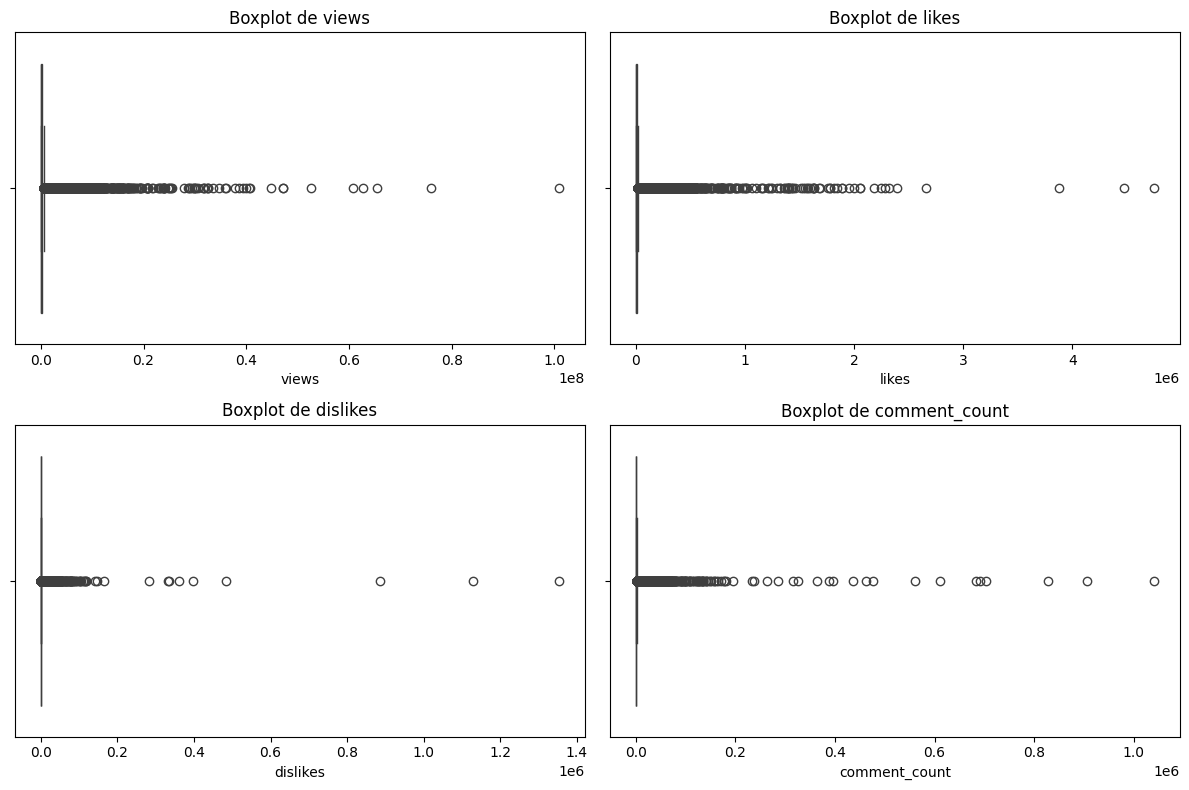

In [18]:
#Analizamos si hay valores atipicos 

columns_to_plot = ['views', 'likes', 'dislikes', 'comment_count']

# Crea subgráficos para cada columna
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=FR_df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

In [15]:
#Analizando los tipos de datos
FR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [32]:
#Obtener la cantidad de filas duplicadas del dataframe
FR_df[FR_df.duplicated()].shape[0]

0

In [34]:
#Verificamos si los comentarios estan desabilitados para ciertos videos
FR_df.comments_disabled.value_counts()

comments_disabled
False    39835
True       889
Name: count, dtype: int64

In [35]:
#Verificamos si los likes estan  desabilitados para ciertos videos
FR_df.ratings_disabled.value_counts()

ratings_disabled
False    40020
True       704
Name: count, dtype: int64

In [36]:
#Veremos si los videos tuvieron un error o han sido removidos 
FR_df.video_error_or_removed.value_counts()

video_error_or_removed
False    40702
True        22
Name: count, dtype: int64

Problemas Reportados 
-El tipo de data de category_id debe ser objeto en ves de entero.
-La tipo de dato de trending_date y publish_time deben ser datetime en ves de object.
-No hay columnas repetidas.
Columnas Inecesarias:
'thumbnail_link','tags', 'description'

